## Hackerearth CrowdStrike Hackathon Solution for Round 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.core.display import HTML
warnings.simplefilter("ignore")

In [4]:
dataset_train = pd.read_csv('Airlines Data CrowdStrike - RawTest_v5.csv')

In [5]:
dataset_train.head(10)

,AirlineID,SourceAirportID,DestinationAirportID
0,2C,ADV,AFH
1,3B,ADV,AHD
2,4A,ADV,BPU
3,6D,ADV,KEM
4,7E,ADV,LZL
5,9K,ADW,AFS
6,1Z,ADW,DBI
7,5L,ADW,GNH
8,8M,ADW,KDD
9,2C,ADW,LZM


In [6]:
#Training Dataset Size
print("Shape of Traning Data is",dataset_train.shape)

Shape of Traning Data is (9900, 3)


In [7]:
dataset_train.describe()

,AirlineID,SourceAirportID,DestinationAirportID
count,9900,9900,9900
unique,9,1991,1989
top,9K,CLP,BRB
freq,1142,13,14


In [8]:
grouped = dataset_train.groupby('SourceAirportID')
print("Class size:\n", grouped.size())

Class size:
 SourceAirportID
ADV    5
ADW    7
ADX    8
ADY    4
ADZ    8
      ..
VCM    3
VCN    3
VCO    3
VCP    3
VCQ    4
Length: 1991, dtype: int64


In [9]:
#Unique Value Counts
print("No of Unique Source Airports",dataset_train['SourceAirportID'].nunique())
print("No of Unique Destination Airports",dataset_train['DestinationAirportID'].nunique())

No of Unique Source Airports 1991
No of Unique Destination Airports 1989


In [10]:
#Missing Values Count
print("No of Missing Values",dataset_train.isnull().sum())

No of Missing Values AirlineID               0
SourceAirportID         0
DestinationAirportID    0
dtype: int64


In [11]:
#Creating Array of Source Airports
source_airport_Array = dataset_train['SourceAirportID'].values
print(source_airport_Array)
print("Size of Source Airport Array:",source_airport_Array.size)

['ADV' 'ADV' 'ADV' ... 'VCQ' 'VCQ' 'VCQ']
Size of Source Airport Array: 9900


In [12]:
#Creating Array of Destination Airports
destination_airport_Array = dataset_train['DestinationAirportID'].values
print(destination_airport_Array)
print("Size of Destination Airport Array:",destination_airport_Array.size)

['AFH' 'AHD' 'BPU' ... 'PBX' 'SBO' 'UWN']
Size of Destination Airport Array: 9900


<h1>Dijkstra's Shortest Path Algorithm Implementation<h1>

<h6>I have created an adjacancy Matrix for getting the connected Node Components of each airport with other.It will be used to determine shortest path between each Node(Airports).<h6>


In [13]:
adjacancy_matrix = pd.crosstab(dataset_train['SourceAirportID'],dataset_train['DestinationAirportID'])

In [16]:
idx = adjacancy_matrix.columns.union(adjacancy_matrix.index)
adjacancy_matrix = adjacancy_matrix.reindex(index=idx,columns=idx,fill_value=0)
adjacancy_matrix.to_csv('Adjacancy_matrix.csv')

In [17]:
adjacancy_matrix.head()

,ADV,ADW,ADX,ADY,ADZ,AEA,AEB,AEC,AED,AEE,...,VCH,VCI,VCJ,VCK,VCL,VCM,VCN,VCO,VCP,VCQ
ADV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print("Size of Adjacancy Matrix is:",adjacancy_matrix.shape)

Size of Adjacancy Matrix is: (2000, 2000)


<h4>I have used NetworkX Api for implementing the Dijkstra Algorithm

In [41]:
import pandas as pd
import networkx as nx
input_data = pd.read_csv('Adjacancy_matrix.csv', index_col=0)
G = nx.DiGraph(input_data.values)

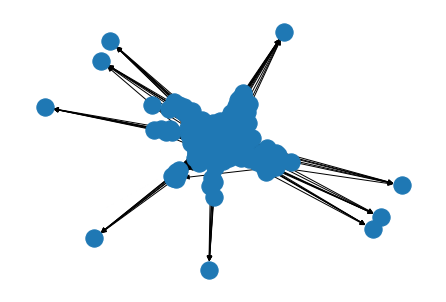

In [42]:
nx.draw(G)

In [43]:
input_data = pd.read_csv('Adjacancy_matrix.csv', index_col=0)

In [44]:
input_data.head(3)

,ADV,ADW,ADX,ADY,ADZ,AEA,AEB,AEC,AED,AEE,...,VCH,VCI,VCJ,VCK,VCL,VCM,VCN,VCO,VCP,VCQ
ADV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
nx.shortest_path_length(G, source=0, target=1799)

4

In [46]:
labels = np.array(input_data.columns)

In [47]:
indexes = list(np.arange(0,2000,1))

<h3>Creating a dictionary to keep a label encoding between Airports and numeric values.

In [48]:
res = {}
for key in labels:
    for value in indexes:
        res[key] = value
        indexes.remove(value)
        break

In [49]:
print(res)

{'ADV': 0, 'ADW': 1, 'ADX': 2, 'ADY': 3, 'ADZ': 4, 'AEA': 5, 'AEB': 6, 'AEC': 7, 'AED': 8, 'AEE': 9, 'AEF': 10, 'AEG': 11, 'AEH': 12, 'AEI': 13, 'AEJ': 14, 'AEK': 15, 'AEL': 16, 'AEM': 17, 'AEN': 18, 'AEO': 19, 'AEP': 20, 'AEQ': 21, 'AER': 22, 'AES': 23, 'AET': 24, 'AEU': 25, 'AEV': 26, 'AEW': 27, 'AEX': 28, 'AEY': 29, 'AEZ': 30, 'AFA': 31, 'AFB': 32, 'AFC': 33, 'AFD': 34, 'AFE': 35, 'AFF': 36, 'AFG': 37, 'AFH': 38, 'AFI': 39, 'AFJ': 40, 'AFK': 41, 'AFL': 42, 'AFM': 43, 'AFN': 44, 'AFO': 45, 'AFP': 46, 'AFQ': 47, 'AFR': 48, 'AFS': 49, 'AFT': 50, 'AFU': 51, 'AFV': 52, 'AFW': 53, 'AFX': 54, 'AFY': 55, 'AFZ': 56, 'AGA': 57, 'AGB': 58, 'AGC': 59, 'AGD': 60, 'AGE': 61, 'AGF': 62, 'AGG': 63, 'AGH': 64, 'AGI': 65, 'AGJ': 66, 'AGK': 67, 'AGL': 68, 'AGM': 69, 'AGN': 70, 'AGO': 71, 'AGP': 72, 'AGQ': 73, 'AGR': 74, 'AGS': 75, 'AGT': 76, 'AGU': 77, 'AGV': 78, 'AGW': 79, 'AGX': 80, 'AGY': 81, 'AGZ': 82, 'AHA': 83, 'AHB': 84, 'AHC': 85, 'AHD': 86, 'AHE': 87, 'AHF': 88, 'AHG': 89, 'AHH': 90, 'AHI': 9

<h1>Applying the Algorithm Upon the Test Dataset

In [50]:
test_dataset = pd.read_csv('testdata.csv')

In [51]:
test_dataset.head()

,PairID,SourceAirportID,DestinationAirportID
0,1804289391,ADW,ADV
1,1804289397,ADX,ADV
2,1804289400,ADY,ADV
3,1804289403,ADZ,ADV
4,1804289410,AEA,ADV


In [52]:
dup_test_set = test_dataset.drop('PairID',axis=1)

In [53]:
dup_test_set.head()

,SourceAirportID,DestinationAirportID
0,ADW,ADV
1,ADX,ADV
2,ADY,ADV
3,ADZ,ADV
4,AEA,ADV


In [54]:
ori_result = []
len(ori_result)

0

In [55]:
nx.shortest_path_length(G, source=res['ADW'], target=res['ADV'])
for i,j in zip(dup_test_set['SourceAirportID'],dup_test_set['DestinationAirportID']):
    try:
        n=nx.shortest_path_length(G, source=res[i], target=res[j])-1
        ori_result.append(n)
    except nx.NetworkXNoPath:
        ori_result.append(-1)

In [56]:
len(ori_result)

3998000

In [57]:
cnt=0;
for i in ori_result:
    if i==9:
        cnt=cnt+1;
print(cnt)

4


In [58]:
test_dataset.shape

(3998000, 3)

<h1>Generating Submission File

In [59]:
output = pd.DataFrame({'PairID':test_dataset.PairID,'Hops':ori_result})

In [60]:
output.to_csv('A.csv',index=False)

In [61]:
best_sub = pd.read_csv('A.csv')

In [62]:
best_sub.shape

(3998000, 2)

In [63]:
best_sub.head()

,PairID,Hops
0,1804289391,4
1,1804289397,4
2,1804289400,5
3,1804289403,4
4,1804289410,6


In [64]:
best_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998000 entries, 0 to 3997999
Data columns (total 2 columns):
PairID    int64
Hops      int64
dtypes: int64(2)
memory usage: 61.0 MB
